## **Analysis of Logistic Regression and Linear Regression on a Breast Cancer Dataset**

Breast cancer is one of the most common cancers and the second leading cause of cancer-related deaths among women. Classification techniques are effective in medical diagnosis and analysis. This study applied Logistic Regression and Linear Regression to the Wisconsin Breast Cancer dataset to evaluate their performance in terms of classification accuracy and effectiveness, supporting early detection and clinical decision-making.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [5]:
# Read the data into a DataFrame
df = pd.read_csv("/content/sample_data/breast-cancer-wisconsin.data", na_values="?", header=None)
df = df.iloc[:, 1:]

# Rename columns
col_names  = [
    "Clump_thickness",
    "Uniformity_of_cell_size",
    "Uniformity_of_cell_shape",
    "Marginal_adhesion",
    "Single_epithelial_cell_size",
    "Bare_nuclei",
    "Bland_chromatin",
    "Normal_nucleoli",
    "Mitoses",
    "Target"
]

df.columns = col_names

In [6]:
df.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Target
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


# **Data Exploration & Data Pre-Procssing**

The data values has 10 independent continuous variables and 1 dependent variable. All of them are integers.

1. Sample code number:            id number
2. Clump Thickness:               1 - 10
3. Uniformity of Cell Size:       1 - 10
4. Uniformity of Cell Shape:      1 - 10
5. Marginal Adhesion:             1 - 10
6. Single Epithelial Cell Size:   1 - 10
7. Bare Nuclei:                   1 - 10
8. Bland Chromatin:               1 - 10
9. Normal Nucleoli:               1 - 10
10. Mitoses:                       1 - 10
11. Target:                        (2 for benign, 4 for malignant)

The Target distribution for the given variable shows majority of values are benign

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Target                       699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [8]:
df.shape

(699, 10)

In [9]:
df.isna().sum()

,0
Clump_thickness,0
Uniformity_of_cell_size,0
Uniformity_of_cell_shape,0
Marginal_adhesion,0
Single_epithelial_cell_size,0
Bare_nuclei,16
Bland_chromatin,0
Normal_nucleoli,0
Mitoses,0
Target,0


In [10]:
df['Target'] = df['Target'].map({2: "0", 4: "1"})
target_distribution = df['Target'].value_counts(normalize=True)
print(target_distribution)

Target
0    0.655222
1    0.344778
Name: proportion, dtype: float64


## Distribution & Normality


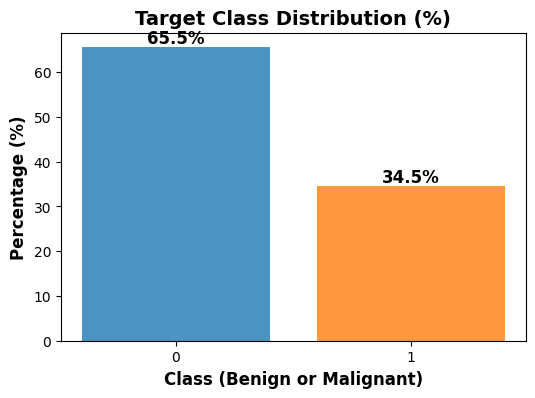

In [13]:
# Calculate percentages
total = target_distribution.values.sum()
percentages = (target_distribution.values / total) * 100

plt.figure(figsize=(6, 4))

# Create bar plot with colors
colors = ['#1f77b4', '#ff7f0e']
bars = plt.bar(target_distribution.index, percentages, color=colors, alpha=0.8)

# Add percentage labels on top of bars
for bar, pct in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{pct:.1f}%", ha='center', va='bottom', fontsize=12, fontweight='bold')

#labels and title
plt.xlabel("Class (Benign or Malignant)", fontsize=12, fontweight='bold')
plt.ylabel("Percentage (%)", fontsize=12, fontweight='bold')
plt.title("Target Class Distribution (%)", fontsize=14, fontweight='bold')

# Save the figure
plt.savefig("target.png", dpi=300, bbox_inches="tight")

plt.show()

**Plotting distribution of the independent variables.**

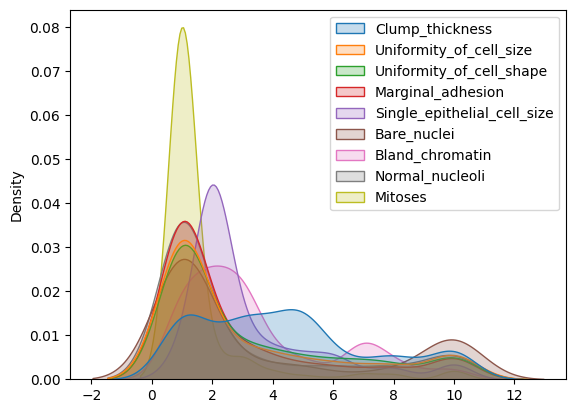

ShapiroResult(statistic=np.float64(0.9021958679893232), pvalue=np.float64(1.0073174108085305e-20))


In [14]:
# Plotting density plot
sns.kdeplot(df, fill=True)
plt.show()

# Shapiro-Wilk test for normality
shapiro_result = stats.shapiro(df['Clump_thickness'])
print(shapiro_result)

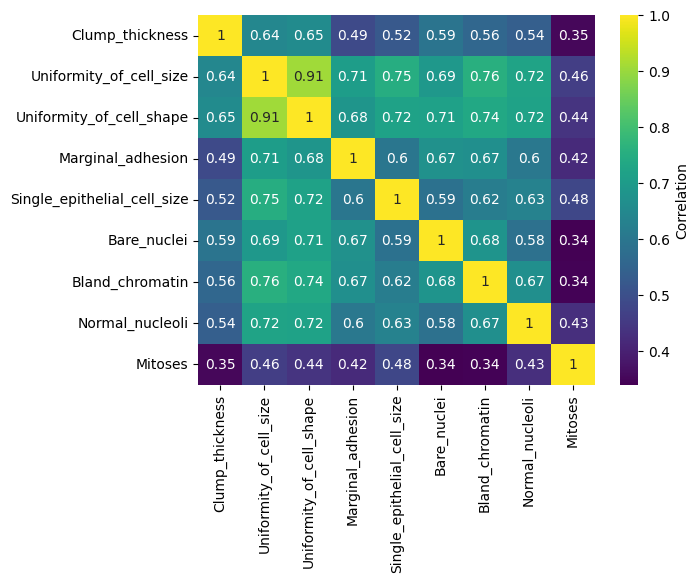

In [15]:
# Calculating correlation matrix
corr_matrix = df.iloc[:, :-1].corr()

# Plotting correlation matrix heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='viridis', cbar_kws={'label': 'Correlation'})
plt.show()

# **Data Imputation**

In [16]:
missing_values = df.isnull().sum()
print(missing_values)

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Target                          0
dtype: int64


In [17]:
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop("Target", axis=1)), columns=df.columns[:-1])
df_imputed["Target"] = df["Target"]
df = df_imputed

In [18]:
df.head(10)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Target
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0
5,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,1
6,1.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,0
7,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,0
8,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,0
9,4.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,0


# **Data Sampling**

In [19]:
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Test Set Target Distribution:")
print(y_test.value_counts(normalize=True))

print("\nTrain Set Target Distribution:")
print(y_train.value_counts(normalize=True))

print("\nOverall Dataset Target Distribution:")
print(y.value_counts(normalize=True))

Test Set Target Distribution:
Target
0    0.678571
1    0.321429
Name: proportion, dtype: float64

Train Set Target Distribution:
Target
0    0.649374
1    0.350626
Name: proportion, dtype: float64

Overall Dataset Target Distribution:
Target
0    0.655222
1    0.344778
Name: proportion, dtype: float64


In [20]:
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (559, 9), Test set: (140, 9)


# **Build the model**

# **LogisticRegression**


In [21]:
# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000 , class_weight='balanced')  # You may need to adjust max_iter based on your data
logreg.fit(X_train, y_train)

# Predict on the train set
y_pred_train = logreg.predict(X_train)

# Predict on the test set
y_pred_test = logreg.predict(X_test)

# Calculate performance metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print accuracy scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9695885509838998
Test Accuracy: 0.9714285714285714


**Logistic Regression Classification Reports**

In [23]:
# classification reports for both train and test sets for Logistic Regression
logreg_train_report = classification_report(y_train, y_pred_train, digits=2)
logreg_test_report = classification_report(y_test, y_pred_test, digits=2)

# Print the Classification Reports for Logistic Regression
print("Logistic Regression - Train Classification Report:\n", logreg_train_report)
print("Logistic Regression - Test Classification Report:\n", logreg_test_report)

Logistic Regression - Train Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       363
           1       0.94      0.97      0.96       196

    accuracy                           0.97       559
   macro avg       0.96      0.97      0.97       559
weighted avg       0.97      0.97      0.97       559

Logistic Regression - Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



**Visualize the Model for Logistic Regression**

In [24]:
# Calculate confusion matrix for Logistic Regression
logreg_cm = confusion_matrix(y_test, y_pred_test)

print("Logistic Regression Confusion Matrix:\n", logreg_cm)

Logistic Regression Confusion Matrix:
 [[94  1]
 [ 3 42]]


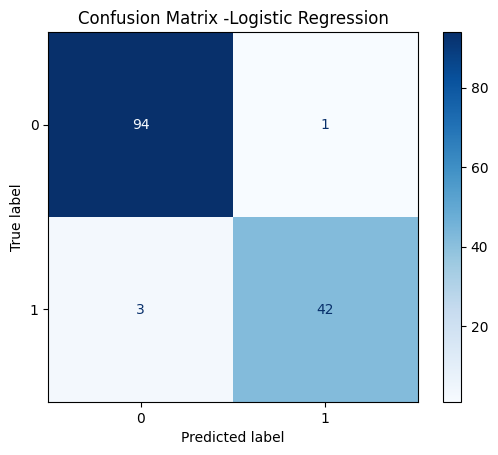

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=logreg_cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix -Logistic Regression')
plt.show()

# **Data Pre-Procssing For Linear Regression**

Logistic Regression was used to estimate the probability of malignancy for each instance based on the input features. These continuous probability scores, ranging from 0 to 1, were added as a new column, **Malignancy_Probability** . The goal is to predict these probabilities using **Linear Regression**, where the **Malignancy_Probability** column serves as the target variable.

In [26]:
# Select only feature columns (excluding target columns)
feature_columns = [col for col in df.columns if col not in ["Target"]]
df[feature_columns] = df[feature_columns].astype(float)  # Convert to float

# Define features and target for logistic regression
X = df[feature_columns]
y = df["Target"]

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Get probabilities (continuous values between 0 and 1)
df["Malignancy_Probability"] = log_reg.predict_proba(X)[:, 1]

In [27]:
df.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Target,Malignancy_Probability
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0,0.018953
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0,0.894387
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0,0.010066
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0,0.754255
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0,0.017928


# **Linear Regression**

In [28]:
# Define new target for Linear Regression
X_new = df[feature_columns]  # Features remain the same
y_new = df["Malignancy_Probability"]  # Use logistic probabilities as target

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_new, y_new)

# Predict and evaluate
y_pred = lin_reg.predict(X_new)
mse = mean_squared_error(y_new, y_pred)
r2 = r2_score(y_new, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Display first few predictions
pred_df = pd.DataFrame({"Actual Probability": y_new, "Predicted Probability": y_pred})
print(pred_df.head())

Mean Squared Error: 0.015237447247742356
R² Score: 0.925344836900572
   Actual Probability  Predicted Probability
0            0.018953               0.099655
1            0.894387               0.709257
2            0.010066               0.079987
3            0.754255               0.653415
4            0.017928               0.079606


**Visualize the Model for Linear Regression**

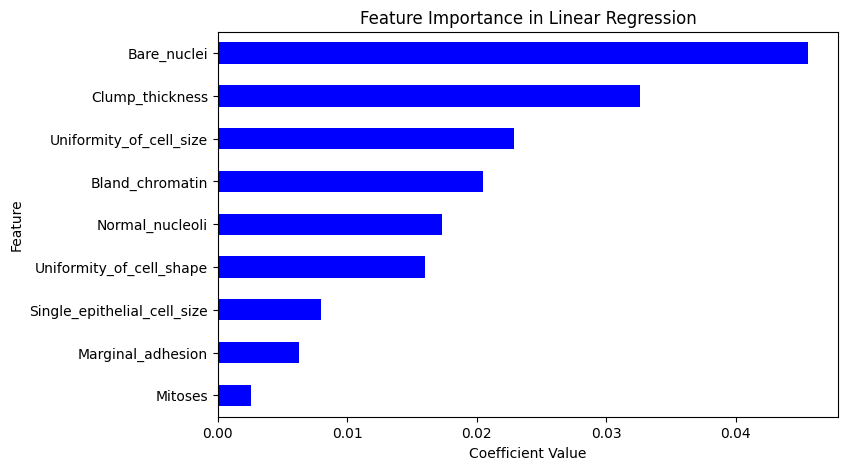

In [34]:
feature_importance = pd.Series(lin_reg.coef_, index=X_new.columns)
plt.figure(figsize=(8,5))
feature_importance.sort_values().plot(kind="barh", color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Linear Regression")
plt.show()

**Real World Example Prediction**

In [33]:
# Example test case: [Clump Thickness, Uniformity of Cell Size, ..., Mitoses]
new_sample = [[8.0, 1.0, 1.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0]]  # Example input

# Logistic Regression Prediction (Classification)
log_pred = log_reg.predict(new_sample)
print("Logistic Regression Prediction:", log_pred)

# Linear Regression Prediction (Probability Estimate)
lin_pred = lin_reg.predict(new_sample)
lin_pred = np.clip(lin_pred, 0, 1)
print("Linear Regression Prediction:", lin_pred)

Logistic Regression Prediction: ['1']
Linear Regression Prediction: [0.91843619]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
